In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from sqlalchemy import create_engine
import configparser


config = configparser.ConfigParser()
config.read('config.cfg')

['config.cfg']

In [55]:
def create_postgres_connection(host, database, user, password, port=5432):
   
    connection_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
    engine = create_engine(connection_string)
    return engine






def read_table_to_dataframe(engine, table_name, schema='public'):
   
    query = f"SELECT * FROM {schema}.{table_name}"
    return pd.read_sql_query(query, engine)





# Create the connection
engine = create_postgres_connection(
    host=config['database']['host'],
    database=config['database']['dbname'],
    user=config['database']['user'],
    password=config['database']['password']
)




# Read the table
try:
    df = read_table_to_dataframe(engine, 'new_data')
    print("Data successfully loaded!")
    print("\nFirst few rows of the data:")
    print(df.head(100))
except Exception as e:
    print(f"Error: {str(e)}")

Data successfully loaded!

First few rows of the data:
     id region     month  sales
0     1   East     March    648
1     2   West    August    883
2     3  North      July    904
3     4   East     March    431
4     5   East      June    763
..  ...    ...       ...    ...
95   96  South  December    632
96   97  South  February    697
97   98   West      July    114
98   99  South     April    149
99  100  North    August    403

[100 rows x 4 columns]


In [56]:
# Clean the data

# Remove rows with missing values
df_clean = df.dropna()
print(df_clean.head())

   id region   month  sales
0   1   East   March    648
1   2   West  August    883
2   3  North    July    904
3   4   East   March    431
4   5   East    June    763


### 1. Descriptive Statistics

a) Total Sales

b) Average Sales per Region or Month

c) Maximum and Minimum Sales

In [57]:
# Calculate the sum of sales for the entire dataset
total_sales = df_clean['sales'].sum()
print(f"The total sales: ${total_sales}")

# Calculate the average sales in each region
average_sales_region = df_clean.groupby('region')['sales'].sum()
print(f"The average sales in each: {average_sales_region}")

# Calculate the average sales in each month
average_sales_month = df_clean.groupby('month')['sales'].sum()
print(f"The average sales in each month: {average_sales_month}")

The total sales: $5516737
The average sales in each: region
East     1365521
North    1399698
South    1380890
West     1370628
Name: sales, dtype: int64
The average sales in each month: month
April        468234
August       462597
December     467001
February     465832
January      457953
July         474594
June         465965
March        438912
May          443637
November     423404
October      502241
September    446367
Name: sales, dtype: int64


### 2. Sales Trends Analysis

a) Monthly Sales Trends

C:\Users\Carlos\AppData\Local\Temp\ipykernel_20860\463199008.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df_clean.groupby('month')['sales'].sum().reindex(month_order, fill_value=0)


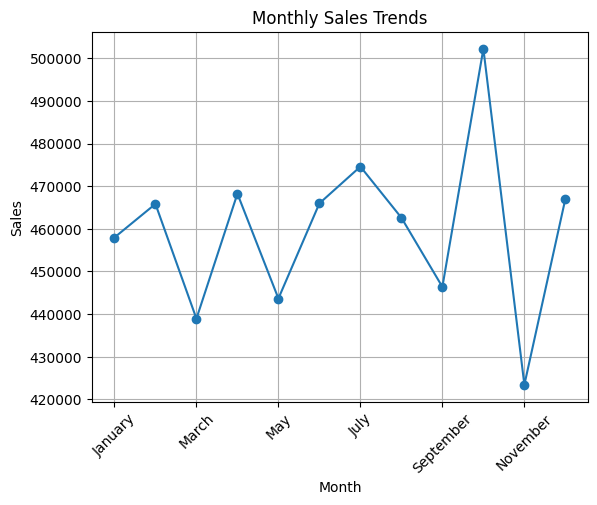

In [58]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_clean['month'] = pd.Categorical(df_clean['month'], categories=month_order, ordered=True)

monthly_sales = df_clean.groupby('month')['sales'].sum().reindex(month_order, fill_value=0)

# Plot the line graph
monthly_sales.plot(kind='line', title='Monthly Sales Trends', marker='o')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid()
plt.show()

b) Regional Sales Comparison

region
East     1365521
North    1399698
South    1380890
West     1370628
Name: sales, dtype: int64


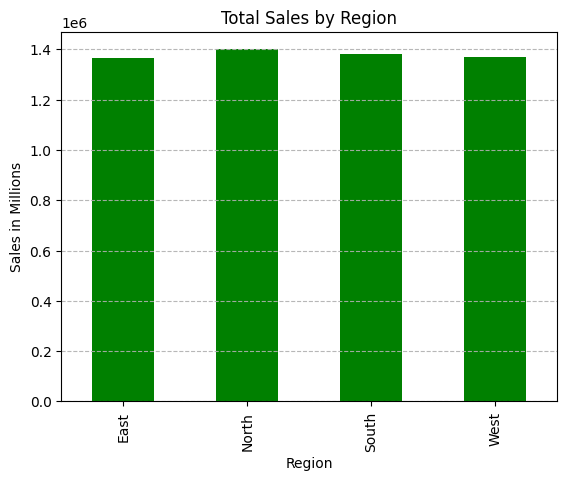

In [59]:
region_sales = df_clean.groupby('region')['sales'].sum()
print(region_sales)

# Plot the bar graph
region_sales.plot(kind='bar', title='Total Sales by Region', color='green')
plt.ylabel('Sales in Millions')
plt.xlabel('Region')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

c) Top Performing Regions

Ranked Regions by Total Sales:
region
North    1399698
South    1380890
West     1370628
East     1365521
Name: sales, dtype: int64


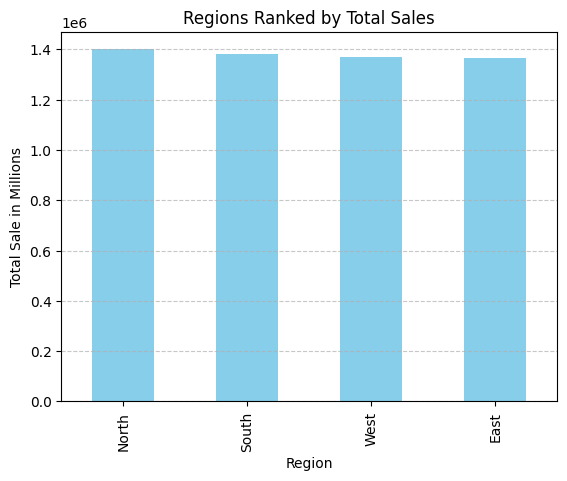

In [60]:
# Sort regions by total sales in descending order
ranked_regions = region_sales.sort_values(ascending=False)

# Display the ranked regions
print("Ranked Regions by Total Sales:")
print(ranked_regions)

# Ranked regions as a bar chart
ranked_regions.plot(kind='bar', title='Regions Ranked by Total Sales', color='skyblue')
plt.ylabel('Total Sale in Millions')
plt.xlabel('Region')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3. Heatmap for Regional Sales by Month

C:\Users\Carlos\AppData\Local\Temp\ipykernel_20860\1443163807.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sales_pivot = df_clean.pivot_table(index='region', columns='month', values='sales', aggfunc='sum', fill_value=0)


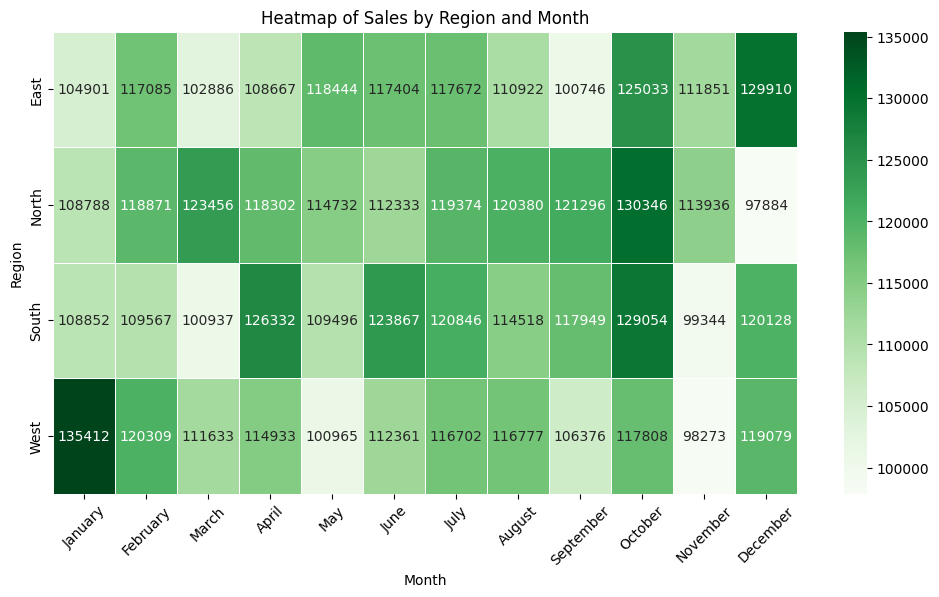

In [61]:
# Pivot table: Regions as rows, Months as columns, Sales as values
sales_pivot = df_clean.pivot_table(index='region', columns='month', values='sales', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, annot=True, fmt=".0f", cmap="Greens", linewidths=0.5)

plt.title('Heatmap of Sales by Region and Month')
plt.xlabel('Month')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.show()

### Darker colors (or lighter, depending on the color palette) represent higher sales.

### In this heatmap, we can see that the highest sales are in the Western region, particularly in the month of January.